This report was created by Jason Conley as a final project for Dr. Silva's class at Kent State University.

# The Story

The Senate race in Ohio in 2022 was heated and had many eyes looking to see who would take the Red State's open Senate seat. Ohio voted for Trump both times, but Tim Ryan was not going to go down quietly. Ryan had support from many democratic voters and organizations inside and outside of the State, so the race was up in the air according to polls until votes began to be counted. 

In the end, Ryan lost by a significant margin. This report is looking to explore the finances of both campaigns and see where the most support for each candidate came from.

## Hypothesis 

Most of the donations for each of the candidates will originate from outside of Ohio, but in-state donations will still be a large portion of the donations.

Below are all of the required libraries for the exploration. 

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns

## Acquiring the Data
The following files were downloaded manually from the FEC website. The datasets will be used to analyze where the individual contributions were coming from for both candidates.

There are a few rows at the bottom of each file with some totals and extranenous information. These were removed.

In [2]:
ryan = pd.read_excel('ryan.xlsx')
vance = pd.read_excel('vance.xlsx')

In [3]:
columns_list = ['Company','Address', 'State', 'Amount']

In [4]:
ryan_all = pd.DataFrame(ryan.iloc[: ,[6, 12, 15, 20]])
ryan_all.columns = columns_list
len(ryan_all.index)

79558

There are 80,000 rows in the Ryan dataset. It should be noted that many are from the ACTBLUE organization. The background to this is that ACTBLUE would put on donation events where they would match any donation made by supporters for a given time. 

In [5]:
vance_all = pd.DataFrame(vance.iloc[: ,[6, 12, 15, 20]])
vance_all.columns = columns_list
len(vance_all.index)

14485

The Vance dataset has significantly less donations in terms of quanitity.

The following cells transform the dataset into a single dataframe containing Company, State, Candidate, and Amount. The amounts are the summed amounts for each of the individual donators. The address, company, and state columns are used as keys to sum the amount. This is done because it is assumed that any triplet of company, address, and state represent an individual donator.

In [98]:
from math import isnan
ryan_totals = ryan_all.groupby(['Company','Address','State']).sum(['Amount']).reset_index()
ryan_totals.drop_duplicates(subset=['Address'], keep='first', inplace=True)
ryan_totals['Cand'] = 'ryan'
vance_totals = vance_all.groupby(['Company','Address', 'State']).sum(['Amount']).reset_index()
vance_totals.drop_duplicates(subset=['Address'], keep='first', inplace=True)
vance_totals['Cand'] = 'vance'

In [113]:
totals = pd.concat([ryan_totals, vance_totals])
totals = totals.astype({'Address':'string', 'State':'string'})
totals.drop(['Address'], axis = 1, inplace = True)
totals = totals[totals.Amount != 0.0]
totals = totals[totals.Amount.notnull()]
totals = totals.groupby(['Company', 'State', 'Cand']).sum(['Amount']).reset_index()
totals = totals.astype({'Amount':'int'})
print(len(totals.index))

217


There are 217 unique Company, State, and Candidate pairings across both campaigns. This is expexted because many entries were left blank for the company column, so they were likely summed into one entry.

In [114]:
totals

,Company,State,Cand,Amount
0,2022 FOUNDERS COMMITTEE,TX,vance,13368
1,697 East Broad LLC,OH,ryan,6500
2,ACADEMY OF RAIL LABOR ATTORNEYS POLITICAL ACTI...,DC,ryan,5000
3,ACTBLUE,MA,ryan,4140682
4,ADOBE,CA,vance,174
...,...,...,...,...
212,"WERNER ENTERPRISES, INC. PAC",NE,vance,2500
213,WINRED,VA,vance,53465
214,Whole Foods,DC,ryan,223
215,Wilke Communications,MD,ryan,3500


In [116]:
totals['Amount'].mean()

67811.60368663595

This is the average sum for a company and state pair for both candidates. The following are for each candidate individually.

In [117]:
ryan = totals['Cand'] == 'ryan'
vance = totals['Cand'] == 'vance'

print(totals[ryan]['Amount'].mean())
print(totals[vance]['Amount'].mean())

85602.95
35463.7012987013


The average for donations to the Ryan campaign were much higher than those to the Vance campaign. These are just descriptive numbers, but the volume of donations as compared between both candidates is interesting.

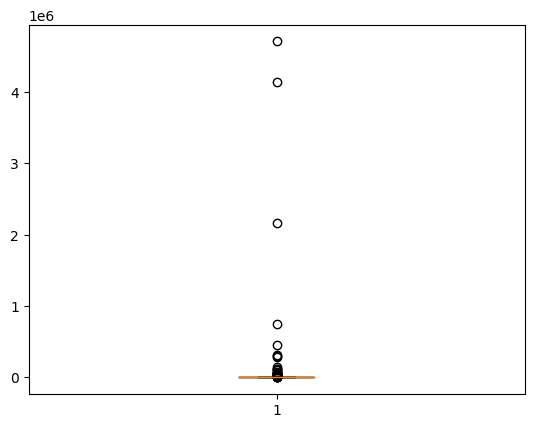

In [118]:
plt.boxplot(totals['Amount'])
plt.show()

This boxplot is not useful because of the outliers in the dataset. A few companies spent a lot more money as the majority of donations. 

In [108]:
len(totals[totals['Amount'] < 250])

50

In [121]:
len(totals[totals['Amount'] > 10000])

35

Lets take a look at the distribution of donations under a sum of 1000 dollars. This can be safely assumed to be small companies and individual donations.

<AxesSubplot: >

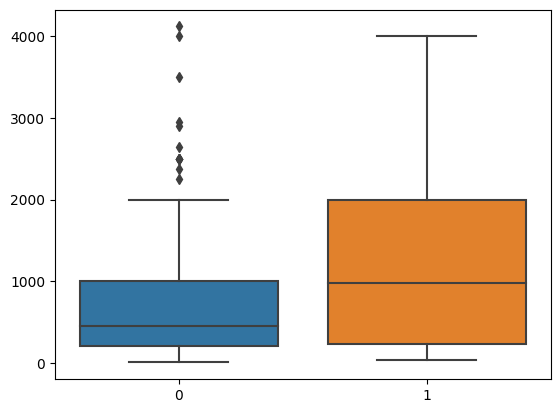

In [110]:
lower = totals['Amount'] < 5000

sns.boxplot(data=[totals[ryan & lower]['Amount'], totals[vance & lower]['Amount']])

A much better plot! We can see that Ryans campaign has a larger percentage of donations in the lowest tiers. The mean for Vance donations is much higher as compared to the Ryan campaign. This can be interpreted as meaning a few things, but a safe interpretation is that individuals who donated to the vance campaign were more likely to donate a higher amount.

A logistic model could be made with the current dataset, and a prediction could be made whether or not an amount was donated to the Ryan campaign or the Vance campaign. This would not be useful in the current state of the project because of the limited size of the two buckets.

In [111]:
print(len(totals[lower & ryan]['Amount']))
print(len(totals[vance & lower]['Amount']))

104
55


The above plots shed some more light on the data that has been gathered. The Ryan campaign has many large number donations as compared to the Vance campaign. Lets have a look at the top 20 companies who donated a sum under 5000 dollars for each campaign.

In [50]:
totals[ryan & lower].sort_values(['Amount'], ascending=False)[['Company','Amount', 'State']].iloc[1:20]

,Company,Amount,State
60,Democratic Women Of South Orange County,4000.00,CA
215,Wilke Communications,3500.00,MD
78,First Bank Merchant Services,2949.46,GA
51,DAVIS DEMOCRATIC CLUB,2900.00,CA
139,Mission Control,2650.00,CT
39,CLEVELAND-CLIFFS INC. POLITICAL ACTION COMMITTEE,2500.00,OH
129,"MASTERS, MATES AND PILOTS POLITICAL CONTRIBUTI...",2500.00,MD
109,INTERNATIONAL ASSOCIATION OF HEAT & FROST INSU...,2500.00,MD
55,DLA PIPER LLP (US) POLITICAL ACTION COMMITTEE ...,2500.00,DC
7,AMERICAN ACADEMY OF FAMILY PHYSICIANS POLITICA...,2500.00,DC


There are some interesting companies in this list. Some democractic organzizations, a trade union, and a tech company from CA!

In [51]:
totals.where(vance & lower).sort_values(['Amount'], ascending=False)[['Company','Amount', 'State']].iloc[1:20]

,Company,Amount,State
72,FRIENDS OF JOHN THUNE,3800.00,SD
44,CPR SOLUTIONS LLC,3500.00,OH
8,AMERICANS UNITED IN SUPPORT OF DEMOCRACY,3000.00,IL
99,HOMELIFE PROPERTIES,2900.00,OH
177,"STONE WORKS PARTNERS, LLC",2900.00,OH
117,LIBERTY SUMMIT LLC,2900.00,OH
101,HUNTSMAN CORPORATION PAC,2500.00,TX
212,"WERNER ENTERPRISES, INC. PAC",2500.00,NE
88,GUARDIAN LEADERSHIP PAC,2500.00,FL
70,FLOWERS FOODS PAC,2500.00,GA


The composition of the Vance list is some more PACs, Fedex, and a company that builds houses. Not much can be implied from these lists because the data quality is unknown, but they are interesting to look into. Lets look at the top companies across all amounts.

<AxesSubplot: xlabel='State'>

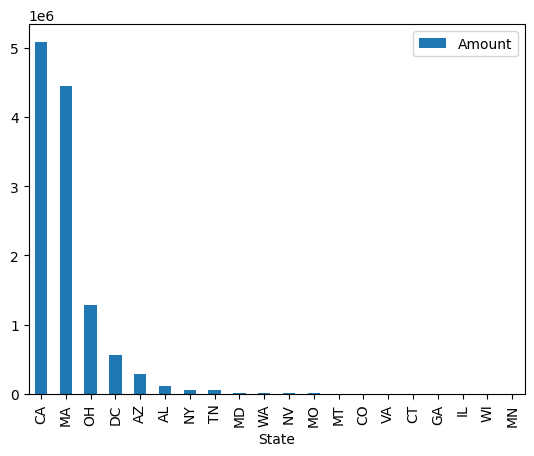

In [88]:
ryan_20 = totals[ryan].groupby('State').sum(numeric_only = True).sort_values(['Amount'], ascending=False)
ryan_20.iloc[0:20].plot.bar()

California has it in for Ryan! I am suprised they topped all of the donations from ACTBLUE in MA, but I guess the sum is greater than the individual. Below is the dataframe for completeness.

In [92]:
totals[ryan].sort_values(['Amount'], ascending=False)[['Company','Amount', 'State']].iloc[1:20]

,Company,Amount,State
3,ACTBLUE,4140682.85,MA
149,OHIO DEMOCRATIC PARTY,753000.00,OH
196,Tim Ryan Victory Fund 2022,452150.31,OH
14,ActBlue Technical Services,312925.30,MA
81,Fraiser LLC,300000.00,DC
18,American Express,284979.41,AZ
30,Blue Action Inc,141764.66,DC
92,Gusto,115498.10,CA
6,ALG Polling Inc,113627.22,AL
75,Facebook,104284.51,CA


Looks like some tech companies are responsible for the large donations from California.

<AxesSubplot: xlabel='State'>

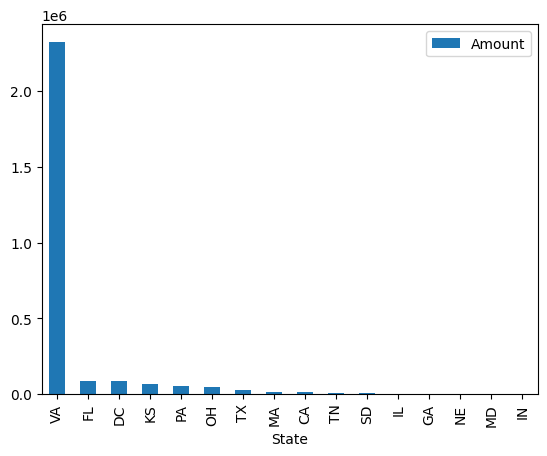

In [89]:
vance_20 = totals[vance].groupby('State').sum(numeric_only = True).sort_values(['Amount'], ascending=False)
vance_20.iloc[0:20].plot.bar()

Virginia came through big for Vance!

In [95]:
totals[vance].sort_values(['Amount'], ascending=False)[['Company','Amount', 'State']].iloc[1:20]

,Company,Amount,State
131,MCCARTHY HENNINGS WHALEN INC.,80749.78,DC
173,SOUTHWEST PUBLISHING & MAILING,64973.81,KS
67,FABRIZIO LEE & ASSOCIATES LLC,56000.00,FL
213,WINRED,53465.71,VA
13,ATLAS & MIGHT,49761.00,PA
5,ADVANCE STRATEGIES,30000.00,FL
40,CMDI,29022.60,VA
87,GRASSROOTS TARGETING,25000.00,VA
100,HUCKABY DAVIS LISKER INC.,13573.84,VA
0,2022 FOUNDERS COMMITTEE,13368.26,TX


Looks like some corporate index company, Huckaby Davis, and WinRed are responsible for the large donation amount.

This concludes my exploration into the Ryan and Vance campaign finance data. It seems that my hypothesis is very wrong. For the Vance campaign, Ohio made a very small percentage of total donations from all States. In the Ryan campaign, Ohio comes in third for total donations. All together, it is obvious that a lot of outside money was flowing into both campaigns. 

This is likely not the whole story. [Open Secrets](https://www.opensecrets.org/races/summary?cycle=2022&id=OHS2) has some additional information regarding campaign finance data. There are possibly some rules that allow both candidates to not reveal all of their finances, or maybe they are not required to do so until some later date. If any new data does become available, it would be intersting to re-run this notebook with the new files. 